Решение задачи классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv. Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Discribe columns:

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt (final weight): continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- class: >50K, <=50K

### Первичный анализ и очистка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Пропуски отсутствуют

In [4]:
data.duplicated().sum()

52

In [5]:
data.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Были найдены дубликаты - устраним их

In [6]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Пропусков в наших данных нет, но мы явно видим, что есть отсутствующие данные, обозначенные в виде "?". Проанализируем их и постараемся устранить

In [7]:
data['workclass'][data['workclass'] == '?'] = 'unknown_workclass'
data['occupation'][data['occupation'] == '?'] = 'unknown_occupation'
data['native-country'][data['native-country'] == '?'] = 'unknown_native-country'

C:\Users\User\AppData\Local\Temp/ipykernel_13760/857242980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass'][data['workclass'] == '?'] = 'unknown_workclass'
C:\Users\User\AppData\Local\Temp/ipykernel_13760/857242980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['occupation'][data['occupation'] == '?'] = 'unknown_occupation'
C:\Users\User\AppData\Local\Temp/ipykernel_13760/857242980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [8]:
data['native-country'][data['native-country'] == '?']

Series([], Name: native-country, dtype: object)

Данные отсутствуют только в категориальных признаках, которые нам так и так предстоит преобразовывать в количественные, то не имеет смысла удалять их, поэтому оставим их.

Данные в educational-num представляю из себя количественное обозначение данных из education, поэтому удалим столбец education-num, так как данные в нём неверно отображают вес признака.

In [9]:
del data['educational-num']

### Построение графиков, визуально иллюстрирующих часть данных.

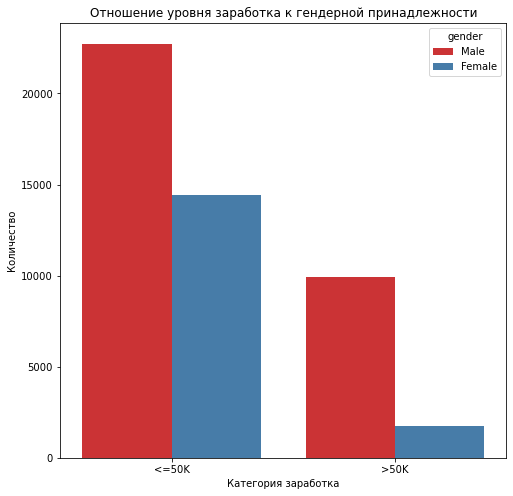

In [10]:
plt.subplots(figsize=(8, 8))
diag = sns.countplot(x="income", hue="gender", data=data, palette="Set1")
diag.set_xlabel("Категория заработка")
diag.set_ylabel("Количество")
diag.set_title("Отношение уровня заработка к гендерной принадлежности")
plt.show()

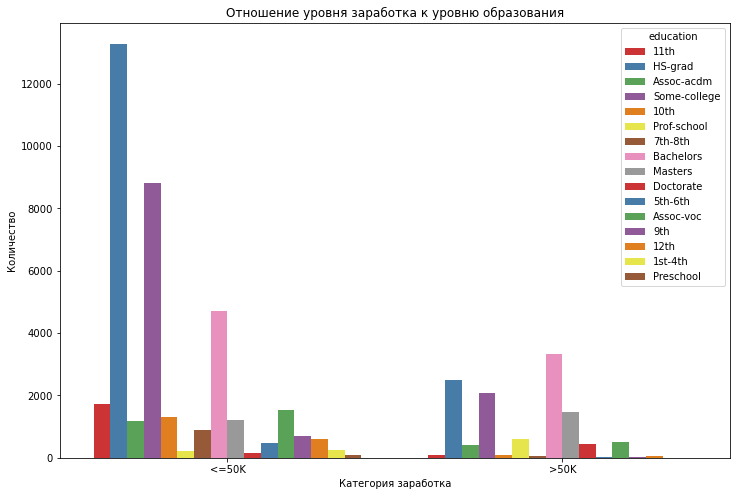

In [11]:
plt.subplots(figsize=(12, 8))
diag = sns.countplot(x="income", hue="education", data=data, palette="Set1")
diag.set_xlabel("Категория заработка")
diag.set_ylabel("Количество")
diag.set_title("Отношение уровня заработка к уровню образования")
plt.show()

### Преобразование категориальных признаков

In [12]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [13]:
workclass = onehotencoder.fit_transform(data[['workclass']]).toarray()
workclass = pd.DataFrame(workclass, columns=onehotencoder.categories_[0])

education = onehotencoder.fit_transform(data[['education']]).toarray()
education = pd.DataFrame(education, columns=onehotencoder.categories_[0])

marital_status = onehotencoder.fit_transform(data[['marital-status']]).toarray()
marital_status = pd.DataFrame(marital_status, columns=onehotencoder.categories_[0])

occupation = onehotencoder.fit_transform(data[['occupation']]).toarray()
occupation = pd.DataFrame(occupation, columns=onehotencoder.categories_[0])

relationship = onehotencoder.fit_transform(data[['relationship']]).toarray()
relationship = pd.DataFrame(relationship, columns=onehotencoder.categories_[0])

race = onehotencoder.fit_transform(data[['race']]).toarray()
race = pd.DataFrame(race, columns=onehotencoder.categories_[0])

gender = onehotencoder.fit_transform(data[['gender']]).toarray()
gender = pd.DataFrame(gender, columns=onehotencoder.categories_[0])

native_country = onehotencoder.fit_transform(data[['native-country']]).toarray()
native_country = pd.DataFrame(native_country, columns=onehotencoder.categories_[0])

In [14]:
data = pd.concat([data, workclass, education, marital_status, occupation, relationship, race, gender, native_country], axis=1)

In [15]:
data.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'],axis=1, inplace=True)

In [16]:
data.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Never-worked,Private,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,unknown_native-country
0,25,226802,0,0,40,<=50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38,89814,0,0,50,<=50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,28,336951,0,0,40,>50K,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,44,160323,7688,0,40,>50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,18,103497,0,0,30,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Преобразование и разделение данных на исходные и искомые.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
le.fit(data['income'])
y = pd.Series(data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [19]:
data.drop('income', axis=1, inplace=True)
X = data

### Обучение моделей логистической регрессии и SVC

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
reg_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
svc_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [23]:
reg_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [24]:
svc_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [25]:
svc_model_pred = svc_model.predict(X_test)
reg_model_pred = reg_model.predict(X_test)

Точность LogisticRegression на train и test данных

In [26]:
reg_model.score(X_train, y_train)

0.8529163360888593

In [27]:
reg_model.score(X_test, y_test)

0.8573037158358071

Точность SVC на train и test данных

In [28]:
svc_model.score(X_train, y_train)

0.8616947764440919

In [29]:
svc_model.score(X_test, y_test)

0.8537209540382844

### Выводы:

Встроенная функция scope показала хороший результат предсказания от обеих моделей: более 85%. При подборе более оптимального параметров kernel + gamma для SVC точность предсказания этого метода должна ещё больше возрасти.

Высокая точность объяснима большим количеством признаков, по которым предсказывались результаты.